## Adaboosting, Gradient Boosting, XGBoost Classifier

we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': customer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10, 6)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
df = pd.read_csv("advertising2.csv")
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
df.shape

(1000, 10)

## Exploratory Data Analysis and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


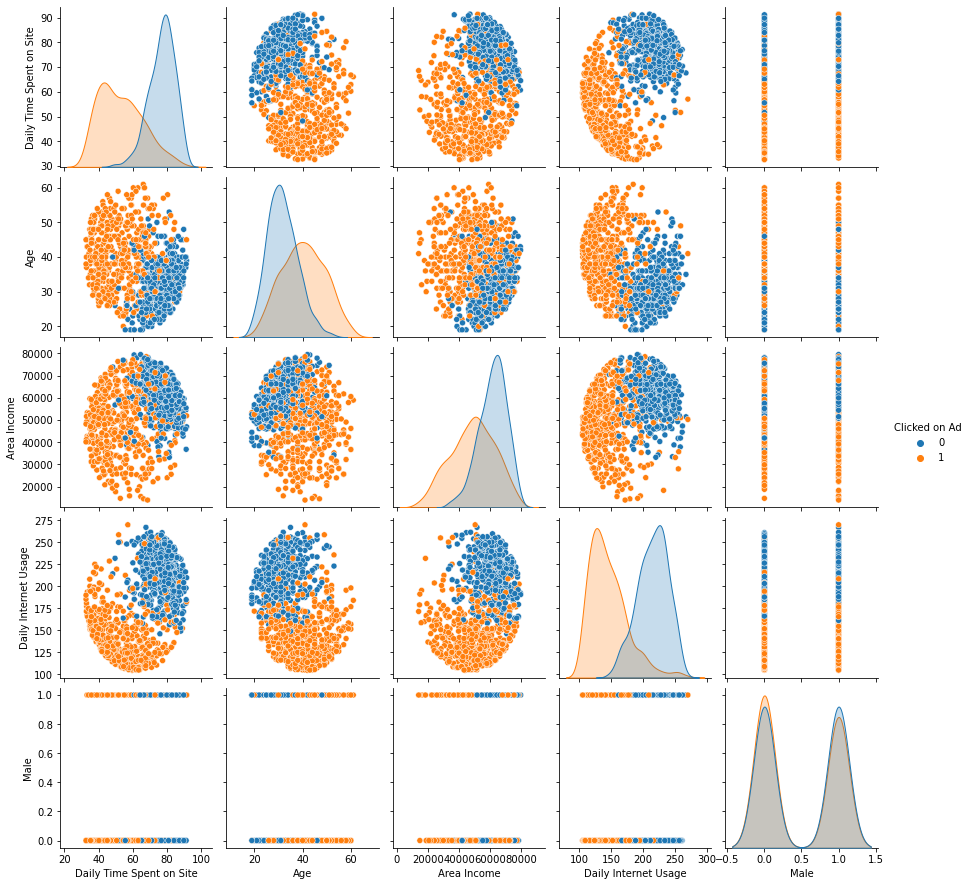

In [6]:
sns.pairplot(df, hue = "Clicked on Ad");

In [7]:
X = df[["Daily Time Spent on Site", "Age", "Area Income", "Daily Internet Usage", "Male"]]
y = df["Clicked on Ad"]

## Scaling

In [8]:
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()

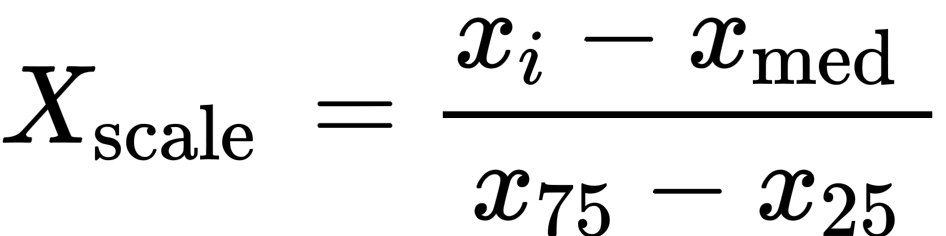

In [9]:
X_ = sc.fit_transform(X)

In [10]:
X_

array([[ 0.02703448,  0.        ,  0.26149161,  0.9124277 ,  0.        ],
       [ 0.44193103, -0.30769231,  0.619863  ,  0.13306237,  1.        ],
       [ 0.04616092, -0.69230769,  0.15042384,  0.66743786,  0.        ],
       ...,
       [-0.61002299,  1.23076923, -0.7916217 , -0.78486791,  1.        ],
       [-0.46583908, -1.23076923, -0.81846342,  0.06027826,  0.        ],
       [-0.85351724, -0.69230769, -1.47170381, -0.05977802,  0.        ]])

## Train Test Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size = 0.2, random_state= 42)

## Ada Boosting and Model Perfomance

In [13]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate

In [14]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [15]:
ada_model = AdaBoostClassifier(n_estimators= 50, random_state= 42)

In [16]:
ada_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [17]:
eval_metric(ada_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 82   7]
 [  9 102]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        89
           1       0.94      0.92      0.93       111

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200


Train_Set
[[409   2]
 [  7 382]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       411
           1       0.99      0.98      0.99       389

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800



### Analyzing Performance As More Weak Learners are Added

In [18]:
error_rates = []
for n in range(1, 101):
    
    model = AdaBoostClassifier(n_estimators= n)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    err = 1 - f1_score(y_test, preds)#1 eksi dersek erro,birk f1 desek tam ters grafik,güvenilirliği veriyor.Grafikte en düşük yeri seçeceğiz ki en az hatalı olsun.
    
    error_rates.append(err)

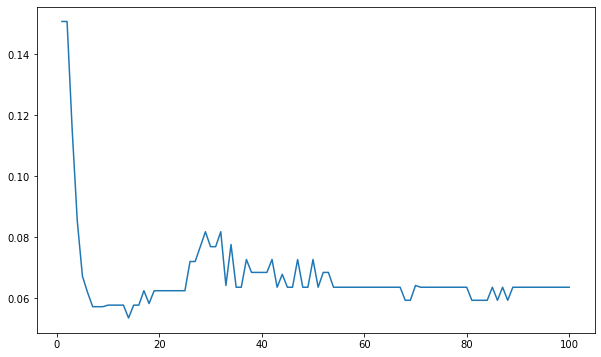

In [19]:
plt.plot(range(1, 101), error_rates)
plt.show()

In [20]:
ada_model = AdaBoostClassifier(n_estimators= 16, random_state= 42)#en iyi rakam 16 imiş.

In [21]:
ada_model.fit(X_train, y_train)
eval_metric(ada_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 81   8]
 [  5 106]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.93        89
           1       0.93      0.95      0.94       111

    accuracy                           0.94       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.94      0.93       200


Train_Set
[[403   8]
 [ 12 377]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       411
           1       0.98      0.97      0.97       389

    accuracy                           0.97       800
   macro avg       0.98      0.97      0.97       800
weighted avg       0.98      0.97      0.97       800



In [22]:
from sklearn.tree import plot_tree

In [23]:
model = AdaBoostClassifier(n_estimators= 16, random_state= 42)
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=16, random_state=42)

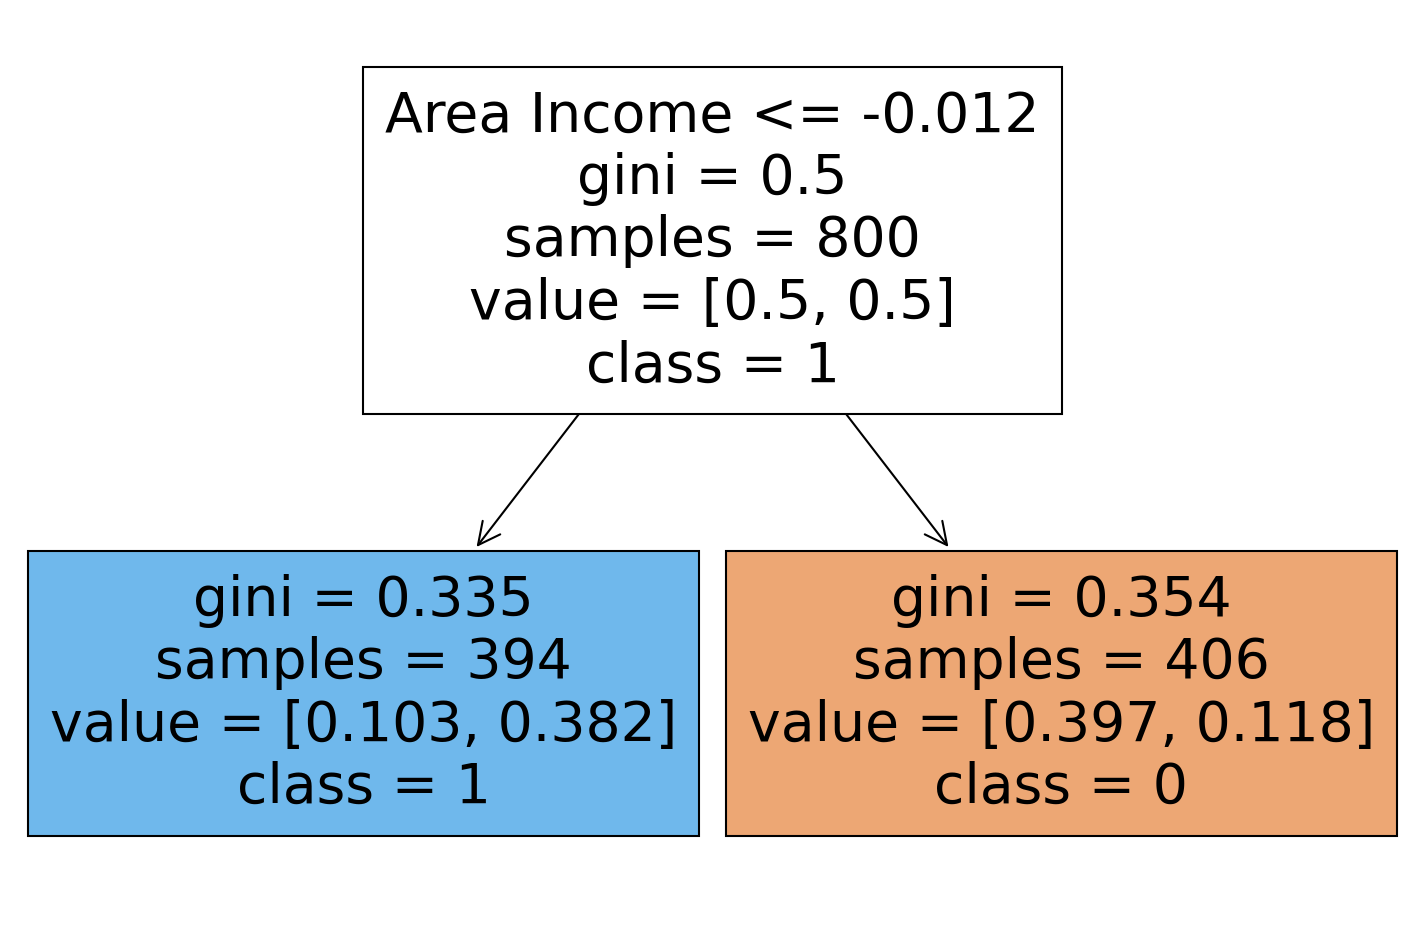

In [24]:
features = list(X.columns)#karar ağacı şeklinde göstersek nasıl olurdu görelim diye visuel bir kod yazdık burda.
targets = df["Clicked on Ad"].astype("str")
plt.figure(figsize= (12, 8), dpi = 150)
plot_tree(model.estimators_[2], filled = True, feature_names= X.columns, class_names = targets.unique());

## GridSearch

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
model = AdaBoostClassifier(random_state= 42)
param_grid = {"n_estimators": range(10, 100), "learning_rate": [0.01, 0.1, 0.2, 0.5, 1.0]}

In [27]:
ada_grid_model = GridSearchCV(model, param_grid, cv = 5, scoring = "f1")

In [28]:
ada_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.5, 1.0],
                         'n_estimators': range(10, 100)},
             scoring='f1')

In [29]:
ada_grid_model.best_params_

{'learning_rate': 0.2, 'n_estimators': 77}

In [30]:
ada_grid_model.best_score_

0.9688694224592425

In [31]:
y_pred = ada_grid_model.predict(X_test)#daha kötü sonuç geldi,hep iyi değil yani.burda learning rate ve cv ile n_estimators parametresini boost etmeyi denedik.

ada_f1 = f1_score(y_test, y_pred)
ada_recall = recall_score(y_test, y_pred)
ada_auc = roc_auc_score(y_test, y_pred)
eval_metric(ada_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 82   7]
 [  6 105]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93        89
           1       0.94      0.95      0.94       111

    accuracy                           0.94       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.94      0.93       200


Train_Set
[[410   1]
 [ 15 374]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       411
           1       1.00      0.96      0.98       389

    accuracy                           0.98       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.98      0.98      0.98       800



# finding the most important feature

In [32]:
model = AdaBoostClassifier(n_estimators= 77, learning_rate= 0.1, random_state= 42)
model.fit(X_train, y_train)
model.feature_importances_

feats = pd.DataFrame(index = X.columns, data = model.feature_importances_, columns =["ada_importance"])
ada_imp_feats = feats.sort_values("ada_importance")
ada_imp_feats

,ada_importance
Male,0.000000
Age,0.168831
Area Income,0.246753
Daily Time Spent on Site,0.285714
Daily Internet Usage,0.298701


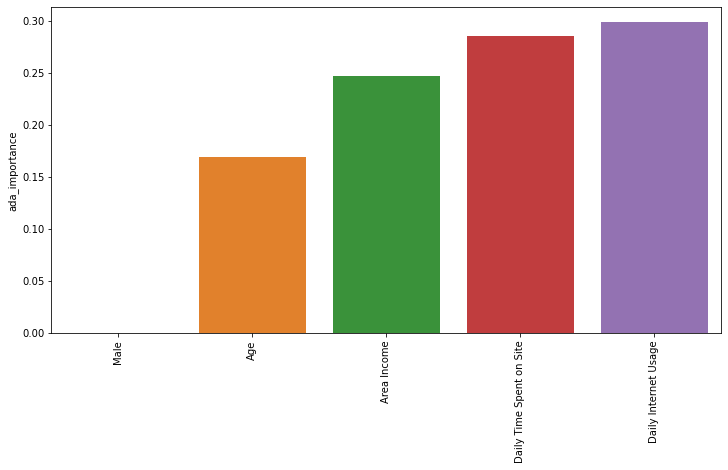

In [33]:
plt.figure(figsize=(12,6))
sns.barplot(data=ada_imp_feats ,x=ada_imp_feats.index, y='ada_importance')

plt.xticks(rotation=90);

## Evaluating ROC Curves and AUC

In [34]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score

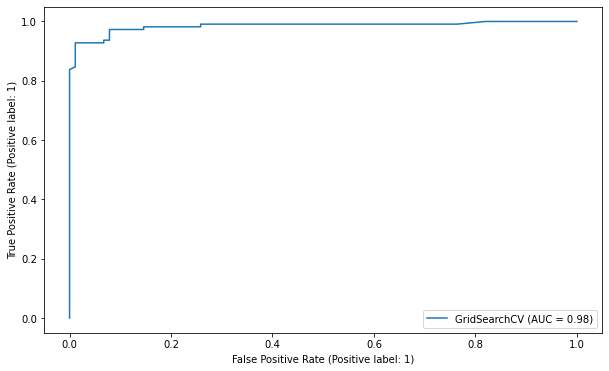

In [35]:
plot_roc_curve(ada_grid_model, X_test, y_test);

## Gradient Boosting Modelling and Model Performance

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

In [37]:
grad_model = GradientBoostingClassifier(random_state = 42)

In [38]:
grad_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [39]:
eval_metric(grad_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 83   6]
 [  8 103]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        89
           1       0.94      0.93      0.94       111

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200


Train_Set
[[411   0]
 [  1 388]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       411
           1       1.00      1.00      1.00       389

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [40]:
model = GradientBoostingClassifier(random_state= 42)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall",
                                                           "f1", "roc_auc"], cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]#aşağıda sonuçları test accuracy falan diye veriyor ama train datayı inceledik programlayan öyle isimlendirmiş kafanı karıştırma

test_accuracy     0.966250
test_precision    0.967471
test_recall       0.964035
test_f1           0.965316
test_roc_auc      0.989052
dtype: float64

## GridSearch

In [41]:
param_grid = {"n_estimators": range(10,101),
             "subsample": [0.5, 1], "max_features": [None, 2, 3, 4]} # "learning_rate": [0.001, 0.01, 0.1], "max_depth": [3, 4, 5, 6] # )

In [42]:
gb_model = GradientBoostingClassifier(random_state = 42)

In [43]:
grid = GridSearchCV(gb_model, param_grid, scoring = "f1", verbose = 2, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 728 candidates, totalling 3640 fits


In [44]:
grid.best_params_

{'max_features': 3, 'n_estimators': 38, 'subsample': 1}

In [45]:
grid.best_score_

0.9649956124339818

In [46]:
y_pred = grid.predict(X_test)

gb_f1 = f1_score(y_test, y_pred)
gb_recall = recall_score(y_test, y_pred)
gb_auc = roc_auc_score(y_test, y_pred)

eval_metric(grid, X_train, y_train, X_test, y_test)

Test_Set
[[ 83   6]
 [  8 103]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        89
           1       0.94      0.93      0.94       111

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200


Train_Set
[[410   1]
 [  8 381]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       411
           1       1.00      0.98      0.99       389

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800



## Feature importances

In [49]:
model = GradientBoostingClassifier(max_features= 3, n_estimators = 100, subsample = 0.5, random_state=42)#yukarıda bulduğumuz best parametreleri kullandık.
model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['grad_importance'])
grad_imp_feats=feats.sort_values("grad_importance")
grad_imp_feats

,grad_importance
Male,0.001442
Age,0.060681
Area Income,0.108617
Daily Time Spent on Site,0.264915
Daily Internet Usage,0.564346


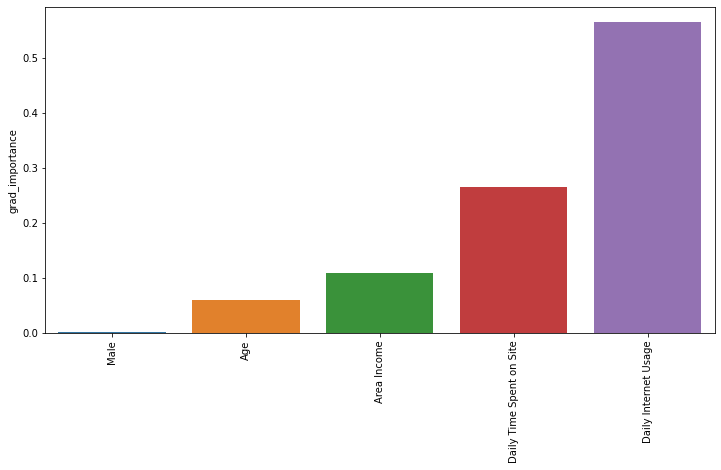

In [50]:
plt.figure(figsize=(12,6))
sns.barplot(data=grad_imp_feats, x=grad_imp_feats.index, y='grad_importance')

plt.xticks(rotation=90);

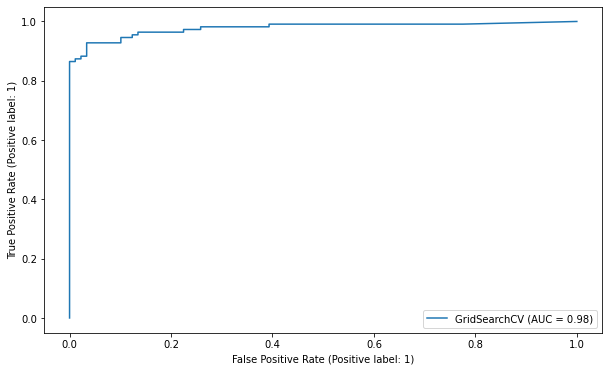

In [51]:
plot_roc_curve(grid, X_test, y_test);

## XG Boosting Modelling and Model Performance

In [53]:
!pip install xgboost
from xgboost import XGBClassifier

In [54]:
xgb = XGBClassifier(random_state = 42).fit(X_train, y_train)

In [55]:
eval_metric(xgb, X_train, y_train, X_test, y_test)

Test_Set
[[ 81   8]
 [  5 106]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.93        89
           1       0.93      0.95      0.94       111

    accuracy                           0.94       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.94      0.93       200


Train_Set
[[411   0]
 [  0 389]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       411
           1       1.00      1.00      1.00       389

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [56]:
model = XGBClassifier(random_state = 42)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1", "roc_auc"], cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.961250
test_precision    0.961748
test_recall       0.958839
test_f1           0.959992
test_roc_auc      0.989615
dtype: float64

## GridSearch

In [67]:
param_grid = {"n_estimators" : [50, 100, 200], "max_depth" : [3, 4, 5], "learning_rate": [0.001,0.01,0.1, 0.2,1],
             "subsample": [0.5, 0.8, 1], "colsample_bytree": [0.5, 0.7, 1]}

In [68]:
xgb_model = XGBClassifier(random_state = 42)

In [69]:
xgb_grid = GridSearchCV(xgb_model, param_grid, scoring = "f1", verbose=2, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


In [70]:
xgb_grid.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 4,
 'n_estimators': 100,
 'subsample': 0.8}

In [72]:
xgb_grid.best_score_

0.9699211166697437

In [73]:
y_pred = xgb_grid.predict(X_test)

xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred)

eval_metric(xgb_grid, X_train, y_train, X_test, y_test)

Test_Set
[[ 82   7]
 [  6 105]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93        89
           1       0.94      0.95      0.94       111

    accuracy                           0.94       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.94      0.93       200


Train_Set
[[411   0]
 [  6 383]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       411
           1       1.00      0.98      0.99       389

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800



## Feature importances

model = XGBClassifier(random_state=42, colsample_bytree = 0.5, subsample= 0.8)
model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['xgb_importance'])
xgb_imp_feats = feats.sort_values("xgb_importance")
xgb_imp_feats

In [79]:
model = XGBClassifier(random_state=42, colsample_bytree = 0.5, subsample= 0.8,learning_rate=0.1,max_depth=4,n_estimators= 100)
model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['xgb_importance'])
xgb_imp_feats = feats.sort_values("xgb_importance")
xgb_imp_feats

,xgb_importance
Male,0.020506
Age,0.086664
Area Income,0.112715
Daily Time Spent on Site,0.287991
Daily Internet Usage,0.492124


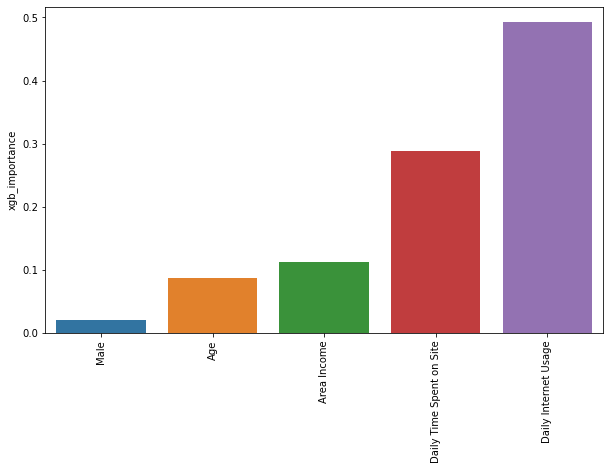

In [80]:
sns.barplot(data=xgb_imp_feats, x=xgb_imp_feats.index,y='xgb_importance')

plt.xticks(rotation=90);

## Evaluating ROC Curves and AUC

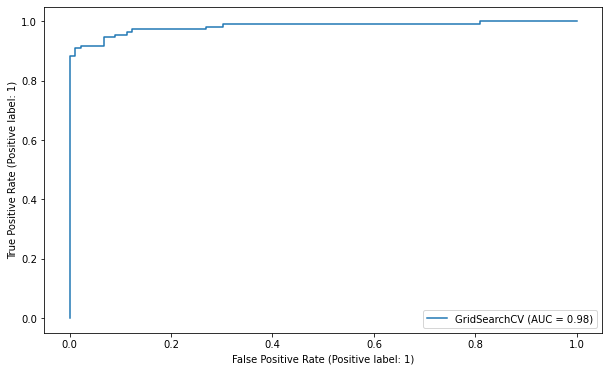

In [81]:
plot_roc_curve(xgb_grid, X_test, y_test);

## Feature importance comparison

In [83]:
pd.concat([ada_imp_feats, grad_imp_feats, xgb_imp_feats], axis = 1)#xgb ortalama gibi sonuç verdi,accuracy ise en yüksek.Zaten hangisinde accuracy yüksekse onu alırmışız.

,ada_importance,grad_importance,xgb_importance
Male,0.000000,0.001442,0.020506
Age,0.168831,0.060681,0.086664
Area Income,0.246753,0.108617,0.112715
Daily Time Spent on Site,0.285714,0.264915,0.287991
Daily Internet Usage,0.298701,0.564346,0.492124


## Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
rf_f1 = f1_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_auc = roc_auc_score(y_test, y_pred)
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 83   6]
 [  8 103]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        89
           1       0.94      0.93      0.94       111

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200


Train_Set
[[411   0]
 [  0 389]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       411
           1       1.00      1.00      1.00       389

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



## Decision Tree

In [86]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
dt_f1 = f1_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_auc = roc_auc_score(y_test, y_pred)
eval_metric(dt_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 79  10]
 [  8 103]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        89
           1       0.91      0.93      0.92       111

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200


Train_Set
[[411   0]
 [  0 389]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       411
           1       1.00      1.00      1.00       389

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



## Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
log_model=LogisticRegression()
log_model.fit(X_train, y_train)
y_pred=log_model.predict(X_test)
log_f1 = f1_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
log_auc = roc_auc_score(y_test, y_pred)
eval_metric(log_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 87   2]
 [  6 105]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        89
           1       0.98      0.95      0.96       111

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200


Train_Set
[[406   5]
 [ 14 375]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       411
           1       0.99      0.96      0.98       389

    accuracy                           0.98       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.98      0.98      0.98       800



## KNN

In [89]:
from sklearn.neighbors import KNeighborsClassifier

In [90]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
knn_f1 = f1_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_auc = roc_auc_score(y_test, y_pred)
eval_metric(knn_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 86   3]
 [ 11 100]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.92        89
           1       0.97      0.90      0.93       111

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200


Train_Set
[[411   0]
 [ 18 371]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       411
           1       1.00      0.95      0.98       389

    accuracy                           0.98       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.98      0.98      0.98       800



## SVM

In [91]:
from sklearn.svm import SVC

In [92]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
svc_f1 = f1_score(y_test, y_pred)
svc_recall = recall_score(y_test, y_pred)
svc_auc = roc_auc_score(y_test, y_pred)
eval_metric(svm_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 84   5]
 [  6 105]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94        89
           1       0.95      0.95      0.95       111

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.95      0.94      0.95       200


Train_Set
[[406   5]
 [ 14 375]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       411
           1       0.99      0.96      0.98       389

    accuracy                           0.98       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.98      0.98      0.98       800



## Comparing Models

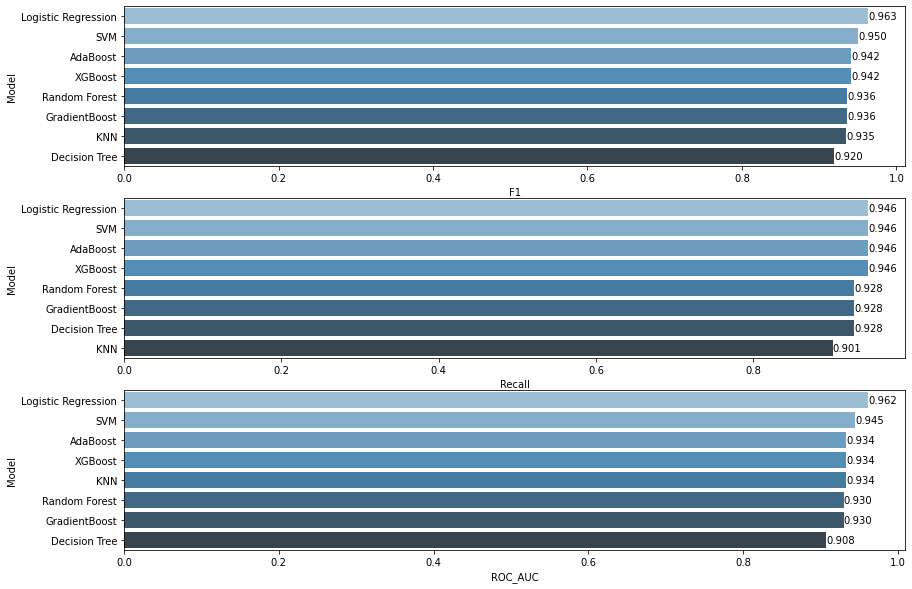

In [93]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "KNN", "SVM", "Decision Tree", "Random Forest", "AdaBoost",
                                 "GradientBoost", "XGBoost"],
                        "F1": [log_f1, knn_f1, svc_f1, dt_f1, rf_f1, ada_f1, gb_f1, xgb_f1],
                        "Recall": [log_recall, knn_recall, svc_recall, dt_recall, rf_recall, ada_recall, gb_recall, xgb_recall],
                        "ROC_AUC": [log_auc, knn_auc, svc_auc, dt_auc, rf_auc, ada_auc, gb_auc, xgb_auc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()